## Questão 1

Numa comunidade em que apenas dez casais trabalham, fez-se um levantamento no qual foram obtidos os seguintes valores para os rendimentos anuais:

(TABELA NA QUESTÃO)

Um casal é escolhido ao acaso entre os dez. Seja $X$ o rendimento do homem e $Y$ o da mulher.

(a) Construa a distribuição de probabilidade conjunta de $X$ e $Y$.
    
(b) Determine as distribuições marginais de $X$ e $Y$.
    
(c) $X$ e $Y$ são v.a. independentes? Justifique.
    
(d) Calcule as médias e variâncias de $X$ e $Y$ e a covariância entre elas.
    
(e) Considere a v.a. $Z$ igual à soma dos rendimentos de cada homem e mulher. Calcule a média e variância de $Z$.
    
(f) Supondo que todos os casais tenham a renda de um ano disponível, e que se oferecerá ao casal escolhido a possibilidade de comprar uma casa pelo preço de 20, qual a probabilidade de que o casal escolhido possa efetuar a compra?



In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## letra a)

In [110]:
lista_x = [10, 10, 5, 10, 15, 10, 5, 15, 10, 5]
lista_y = [5, 10, 5, 5, 5, 10, 10, 10, 10, 10]

data = {'X' : lista_x, 'Y': lista_y}
data = pd.DataFrame(data)
data

data_table = pd.crosstab(data["X"], data["Y"], normalize=True, margins=True).T
data_table

X,5,10,15,All
Y,,,,
5,0.1,0.2,0.1,0.4
10,0.2,0.3,0.1,0.6
All,0.3,0.5,0.2,1.0


## letra b)

Distribuição marginal de *X*

In [66]:
data_table[2:3]

X,5,10,15,All
Y,,,,
All,0.3,0.5,0.2,1.0


Distribuição marginal de *Y*.

In [67]:
data_table['All']

Y
5      0.4
10     0.6
All    1.0
Name: All, dtype: float64

## letra c)

Para que a condição de independência seja garantida é necessário que $P(X \cap Y) = P(X) \cdot P(Y)$ ou seja $P(X=5, Y=5) = P(X=5) \cdot P(Y=5)$

A probabilidade de $P(X=5,Y=5)$ é

In [111]:
print('Probabilidade dos valores de X e Y serem iguais a 5 :',data_table[5][5])
print('Probabilidade de X ser igual a 5 :',data_table[5]['All'])
print('Probabilidade de Y ser igual a 5 :',data_table['All'][5])

Probabilidade dos valores de X e Y serem iguais a 5 : 0.1
Probabilidade de X ser igual a 5 : 0.3
Probabilidade de Y ser igual a 5 : 0.4


agora vamos comparar se $P(X=5, Y=5)$ é igual a $P(X=5) \cdot P(Y=5)$.

In [82]:
data_table[5][5] == data_table[5]['All']*data_table['All'][5]

False

O resultado retornou `False`, então as variáveis não são independentes.

## letra d)

In [178]:
print('Média da variável X :',data['X'].mean())
print('Média da variável Y :',data['Y'].mean())
print(''*254)
print('Variância da variável X :',data['X'].var())
print('Variância da variável Y :',data['Y'].var())
print(''*254)
print('Covariância entre as variáveis X e Y:', 
      ((data['X'] - data['X'].mean())*(data['Y'] - data['Y'].mean())).sum()
      /(len(data['X'])))

Média da variável X : 9.5
Média da variável Y : 8.0

Variância da variável X : 13.61111111111111
Variância da variável Y : 6.666666666666667

Covariância entre as variáveis X e Y: -1.0


## letra e)

In [85]:
data['Z'] = data['X'] + data['Y']

print('Média da variável Z :',data['Z'].mean())
print('Variância da variável Z :',data['Z'].var())

Média da variável Z : 17.5
Variância da variável Z : 18.055555555555557


## letra f)

Necessário selecionar obsevarções cuja a soma dos salários dos casais seja igual ou maior que 20. Como esses salários estão somados na variável *Z*, basta selecionar os valores que maiores iguais a 20.

In [109]:
print('A probabilidade de um casal escolhido comprar uma casa é de',
      (len(data[data['Z']>=20])/len(data))*100,'%')

A probabilidade de um casal escolhido comprar uma casa é de 50.0 %


# Questão 2

Suponha que realizemos um experimento e os resultados possíveis sejam $\omega_1$, $\omega_2$, $\omega_3$, $\omega_4$, $\omega_5$. Definamos as v.a. $X$ e $Y$ cujos valores em cada ponto são dados na tabela a seguir.

(TABELA NA QUESTÃO)

Obtenha as distribuições de probabilidades de $X$, $Y$, $X+Y$, $X-Y-1$ e $X-Y$, supondo que os cinco resultados tenham a mesma probabilidade. Faça um diagrama de dispersão para as variáveis $X$ e $Y$. Idem para $X$ e $X+Y$.

In [144]:
lista1 = [3,2,2,1,3]
lista2 = [1,2,0,0,2]

data2 = pd.DataFrame({'X' : lista1,'Y' : lista2})
data2['X+Y'] = data2['X']+data2['Y']
data2['X-Y-1'] = data2['X']-data2['Y']-1
data2['X-Y'] = data2['X']-data2['Y']

In [146]:
pd.DataFrame(data2['X'].value_counts()/len(data2))

,X
3,0.4
2,0.4
1,0.2


In [147]:
pd.DataFrame(data2['Y'].value_counts()/len(data2))

,Y
2,0.4
0,0.4
1,0.2


In [148]:
pd.DataFrame(data2['X+Y'].value_counts()/len(data2))

,X+Y
4,0.4
5,0.2
2,0.2
1,0.2


In [149]:
pd.DataFrame(data2['X-Y-1'].value_counts()/len(data2))

,X-Y-1
0,0.4
1,0.4
-1,0.2


In [150]:
pd.DataFrame(data2['X-Y'].value_counts()/len(data2))

,X-Y
2,0.4
1,0.4
0,0.2


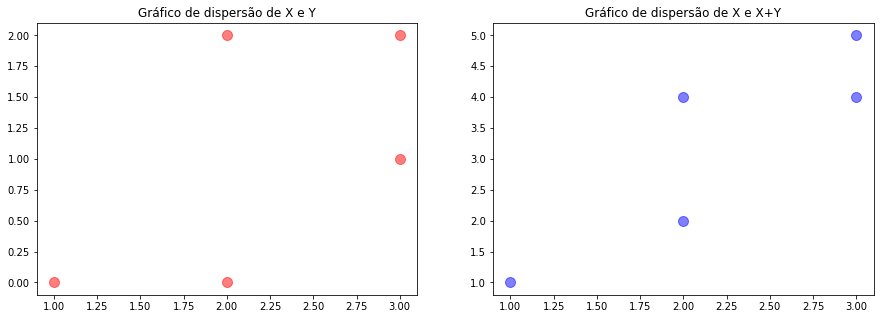

In [181]:
%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].title.set_text('Gráfico de dispersão de X e Y')
ax[1].title.set_text('Gráfico de dispersão de X e X+Y')
ax[0].scatter(data2['X'], data2['Y'], s=100, c='red', alpha=0.5)
ax[1].scatter(data2['X'], data2['X+Y'], s=100, c='blue', alpha=0.5)
plt.show()